### **Summary**
In this notebook I loaded the dataset from .mat file,
the data is a LARGE photo with 6-Channels.

---

* 1st Channel is Blue.
* 2nd Channel is Green. 
* 3rd Channel is Red.
* 4th, 5th and 6th are Infrared.

In [ ]:
from scipy.io import loadmat
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
!pip install patchify
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
patch_size = 256

In [ ]:
!wget http://www.cis.rit.edu/~rmk6217/rit18_data.mat
!cp /content/rit18_data.mat /content/drive/MyDrive/DS-LAB1

--2022-04-28 21:09:43--  http://www.cis.rit.edu/~rmk6217/rit18_data.mat
Resolving www.cis.rit.edu (www.cis.rit.edu)... 129.21.57.5
Connecting to www.cis.rit.edu (www.cis.rit.edu)|129.21.57.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3045195408 (2.8G)
Saving to: ‘rit18_data.mat’

rit18_data.mat      100%[===================>]   2.84G   101MB/s    in 31s     

2022-04-28 21:10:14 (93.0 MB/s) - ‘rit18_data.mat’ saved [3045195408/3045195408]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/DS-LAB1/rit18_data.mat'
dataset = loadmat(file_path)

#Load Training Data and Labels
train_data = dataset['train_data']
train_mask = train_data[-1]
train_data = train_data[:6]
train_labels = dataset['train_labels']

#Load Validation Data and Labels
val_data = dataset['val_data']
val_mask = val_data[-1]
val_data = val_data[:6]
val_labels = dataset['val_labels']

#Load Test Data
test_data = dataset['test_data']
test_mask = test_data[-1]
test_data = test_data[:6]

band_centers = dataset['band_centers'][0]
band_center_units = dataset['band_center_units']
classes = dataset['classes']                          

print("Train data shape", train_data.shape)
print("Validation data shape", val_data.shape)
print("Test data shape", test_data.shape)

Train data shape (6, 9393, 5642)
Validation data shape (6, 8833, 6918)
Test data shape (6, 12446, 7654)


In [ ]:
# To be able to view the RGB IMAGE
def rescale(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)

In [ ]:
# Put the channels in alist to faciliate looping on the channel
channels = []
channels.append(train_data[0])
channels.append(train_data[1])
channels.append(train_data[2])
channels.append(train_data[3])
channels.append(train_data[4])
channels.append(train_data[5])
rtrain_data = np.dstack(channels)

In [ ]:
# To be able to view the RGB IMAGE
def rescale(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)
# Create the RGB image
r = rescale(rtrain_data[:,:,2])
g = rescale(rtrain_data[:,:,1])
b = rescale(rtrain_data[:,:,0])
rgb_uint8 = (np.dstack([r,g,b]) * 255.999) .astype(np.uint8)
image_rgb = Image.fromarray(rgb_uint8, 'RGB')

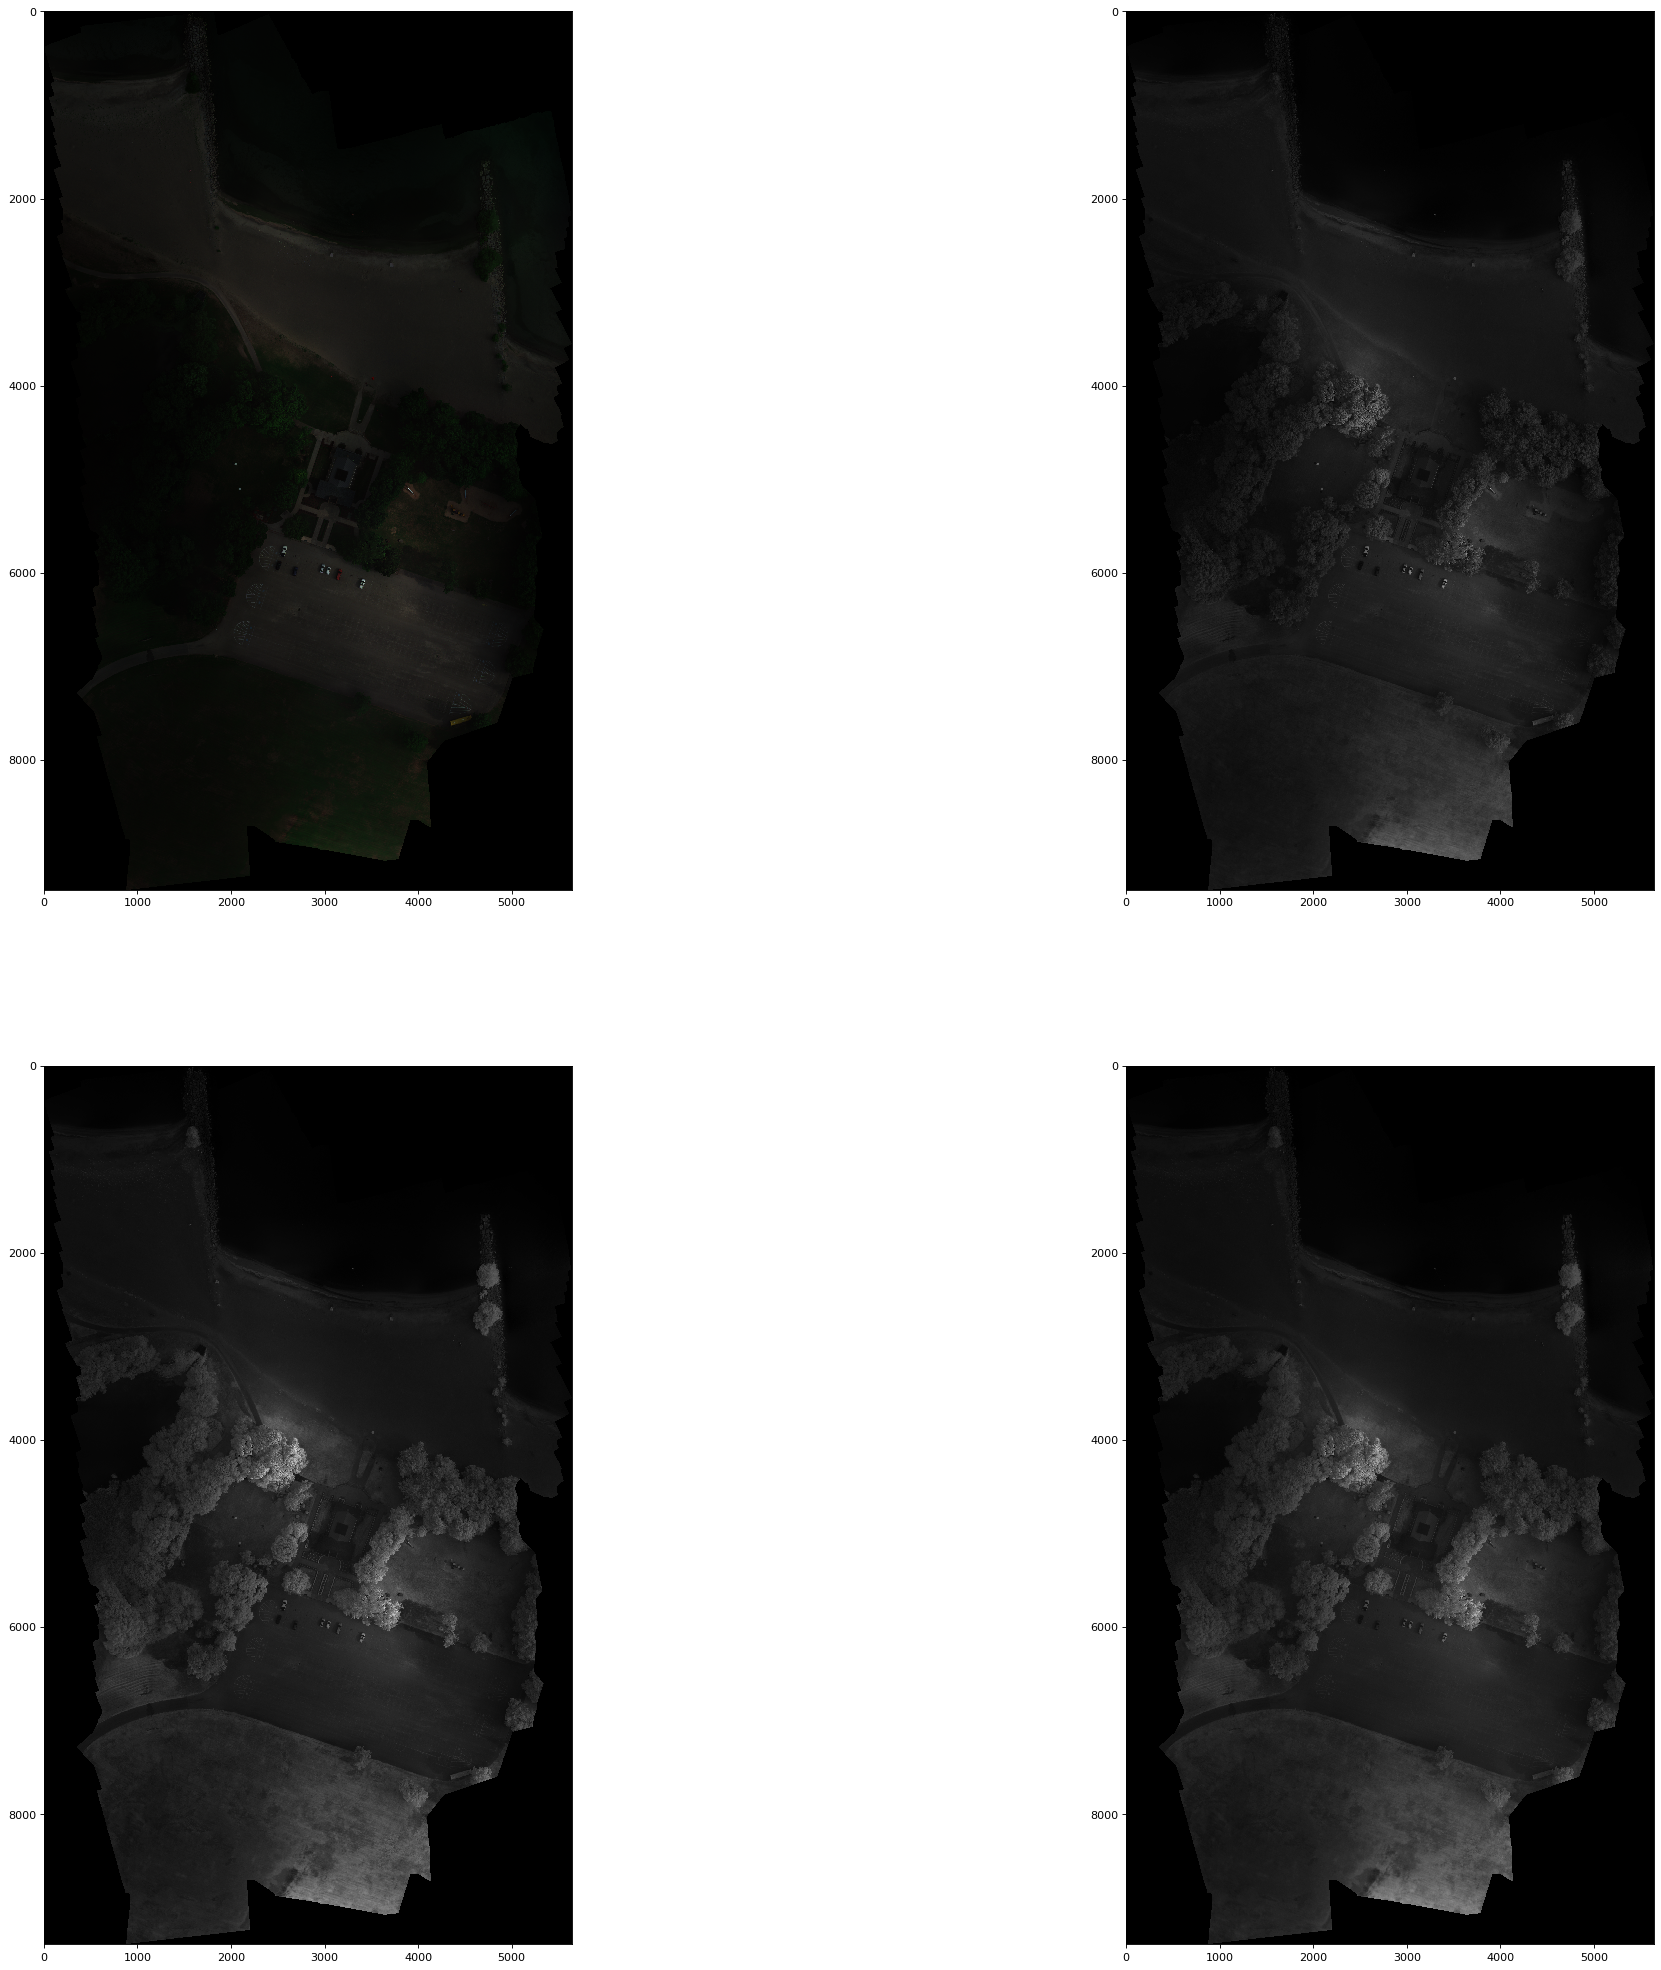

In [ ]:
images = []
images.append(image_rgb)
images.append(rtrain_data[:,:,3])
images.append(rtrain_data[:,:,4])
images.append(rtrain_data[:,:,5])
plt.figure(figsize=(32, 32), dpi=80)
for i, img in enumerate(images):
    plt.subplot(2,2,i+1)
    plt.imshow(img,cmap='gray',interpolation='none')

In [ ]:
train_mask.shape

(9393, 5642)

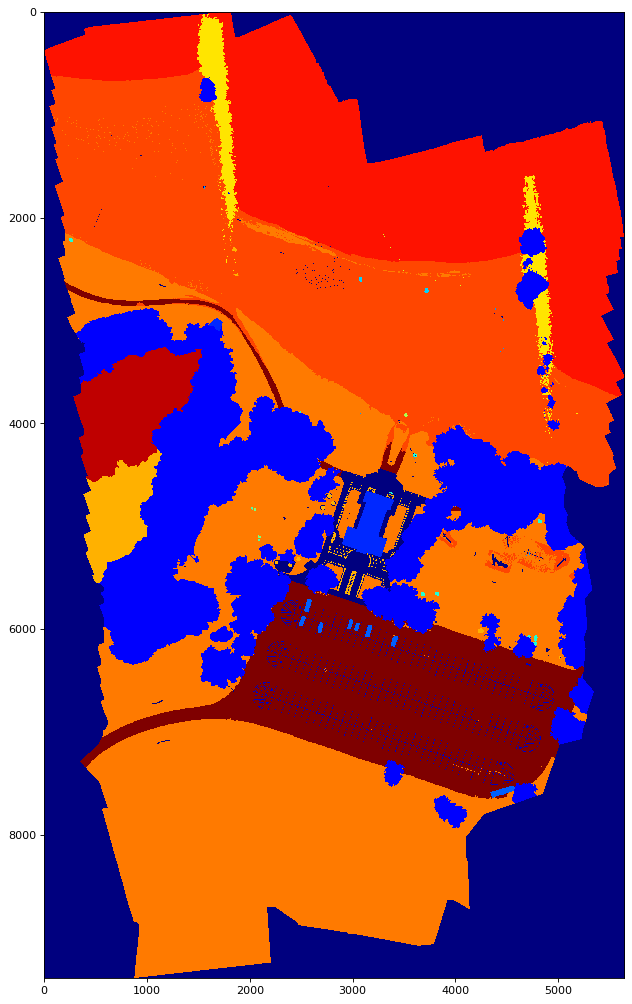

In [ ]:
labeled    = Image.fromarray(train_labels)
mask = Image.fromarray(train_mask)
plt.figure(figsize=(16, 16), dpi=80)
# plt.imshow(mask,cmap='gray',interpolation='none')
plt.imshow(labeled,cmap='jet',interpolation='none')